# Pima Indians Diabetes Dataset

Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [315]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [316]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Dataset

In [317]:
df = pd.read_csv("/content/drive/MyDrive/Spring2024/CSCE464/diabetes.csv", sep=",")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Preparation

In [318]:
x = df.iloc[:, 0: -1].to_numpy()
y = df.iloc[:, [-1]].to_numpy()
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [319]:
x.shape

torch.Size([768, 8])

In [320]:
y.shape

torch.Size([768, 1])

# PyTorch Implementation

Epoch:    0 Cost: 0.693 Accuracy: 34.90
Epoch:  100 Cost: 0.660 Accuracy: 65.36
Epoch:  200 Cost: 0.653 Accuracy: 65.23
Epoch:  300 Cost: 0.647 Accuracy: 64.97
Epoch:  400 Cost: 0.643 Accuracy: 65.23
Epoch:  500 Cost: 0.639 Accuracy: 65.49
Epoch:  600 Cost: 0.636 Accuracy: 65.76
Epoch:  700 Cost: 0.634 Accuracy: 65.76
Epoch:  800 Cost: 0.632 Accuracy: 65.89
Epoch:  900 Cost: 0.630 Accuracy: 66.02
Epoch: 1000 Cost: 0.629 Accuracy: 66.02


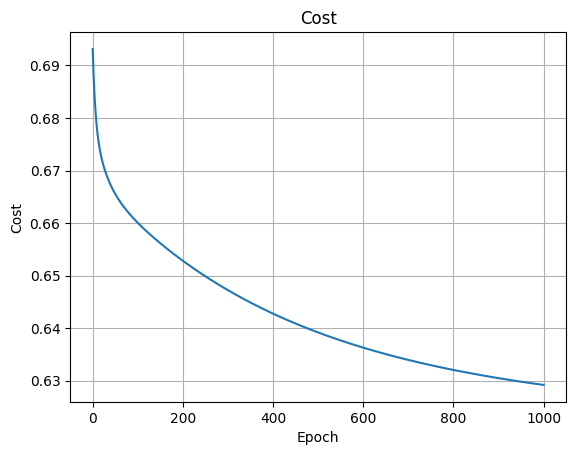

In [321]:
x_axis = []
y_axis = []

W = torch.zeros((8, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.00001)

for epoch in range(1001):
  hypothesis = torch.sigmoid(x.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y_axis.append(cost.item())

  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print("Epoch: {:4d} Cost: {:.3f} Accuracy: {:2.2f}".\
          format(epoch, cost.item(), accuracy*100))

plt.title("Cost")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid()
plt.plot(x_axis, y_axis)
plt.show()

# PyTorch With Dataset Split

In [322]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [323]:
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]

In [324]:
x_data.shape

(768, 8)

In [325]:
y_data.shape

(768, 1)

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [327]:
x_train.shape

(614, 8)

In [328]:
y_train.shape

(614, 1)

In [329]:
x_test.shape

(154, 8)

In [330]:
y_test.shape

(154, 1)

# Normalize the Dataset using the Standard Scaler

In [331]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [332]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [333]:
x_train

array([[ 0.04016883, -0.11135013,  0.0198056 , ...,  1.571222  ,
         1.27723412, -0.62077165],
       [ 0.64172155, -0.2067487 , -0.50891791, ...,  0.22324061,
        -0.69870197,  0.58214835],
       [ 1.24327427, -0.9699373 ,  0.65427382, ...,  0.46038549,
         0.32674589,  2.98798835],
       ...,
       [ 0.94249791,  2.3690128 ,  1.07725263, ...,  0.98460047,
        -0.08103454,  0.66807121],
       [-0.56138389,  0.0476475 , -1.14338612, ...,  1.27167058,
         0.12585406, -0.62077165],
       [-0.56138389, -0.30214728,  0.28416736, ...,  0.4728668 ,
        -0.98954538, -1.05038594]])

In [334]:
x_test

array([[-0.56138389, -0.04775108, -0.82615201, ..., -0.63796972,
        -0.069041  , -0.5348488 ],
       [ 1.84482698, -0.2067487 , -3.68125897, ...,  0.42294156,
        -1.03152277, -0.36300308],
       [-0.86216025, -0.588343  , -2.09508844, ...,  1.42144629,
        -0.88460188, -0.01931165],
       ...,
       [ 2.14560334,  1.06523229,  0.33703971, ...,  0.17331538,
         2.62350925,  1.52729978],
       [ 0.34094519,  0.68363799,  0.44278441, ...,  1.63362855,
        -0.86361318,  1.18360835],
       [-1.16293661,  1.86022041,  0.44278441, ...,  3.43093707,
         5.82278667, -0.70669451]])

In [335]:
class binaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(8, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [336]:
model = binaryClassifier()

In [337]:
x_train, x_test = torch.Tensor(x_train), torch.Tensor(x_test)

In [338]:
y_train, y_test = torch.Tensor(y_train.to_numpy()), torch.Tensor(y_test.to_numpy())

In [339]:
x_train.shape

torch.Size([614, 8])

In [340]:
y_train.shape

torch.Size([614, 1])

In [341]:
x_test.shape

torch.Size([154, 8])

In [342]:
y_test.shape

torch.Size([154, 1])

# Model Training

=====Summary of Model Training=====
Epoch:    0 Cost: 0.791 Training Accuracy: 36.48
Epoch:  100 Cost: 0.482 Training Accuracy: 78.01
Epoch:  200 Cost: 0.472 Training Accuracy: 78.66
Epoch:  300 Cost: 0.471 Training Accuracy: 78.83
Epoch:  400 Cost: 0.470 Training Accuracy: 78.83
Epoch:  500 Cost: 0.470 Training Accuracy: 78.83
Epoch:  600 Cost: 0.470 Training Accuracy: 78.99
Epoch:  700 Cost: 0.470 Training Accuracy: 78.99
Epoch:  800 Cost: 0.470 Training Accuracy: 78.99
Epoch:  900 Cost: 0.470 Training Accuracy: 78.99
Epoch: 1000 Cost: 0.470 Training Accuracy: 78.99


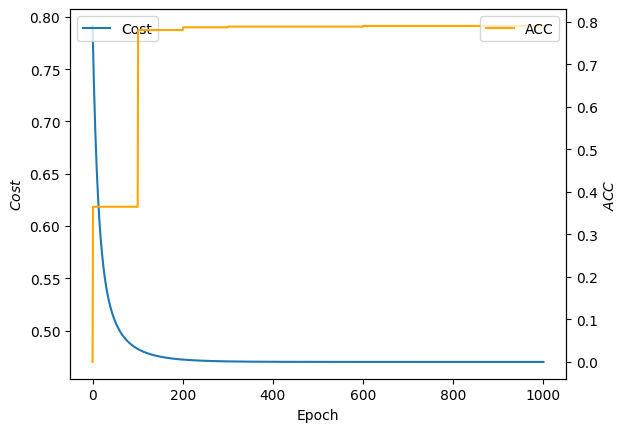

In [343]:
x_axis = []
y1_axis = []
y2_axis = []
accuracy = 0

optimizer = optim.SGD(model.parameters(), lr=0.1)

print("=====Summary of Model Training=====")

for epoch in range(1001):
  x = x_train
  y = y_train

  hypothesis = model(x)
  cost = F.binary_cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y1_axis.append(cost.item())
  y2_axis.append(accuracy)

  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print("Epoch: {:4d} Cost: {:.3f} Training Accuracy: {:2.2f}".\
          format(epoch, cost.item(), accuracy*100))

fig, x1 = plt.subplots()
x1.set_xlabel("Epoch")
x1.set_ylabel("$Cost$")
x1.plot(x_axis, y1_axis, label="Cost")
x1.legend(loc='upper left')

x2 = x1.twinx()
x2.set_ylabel("$ACC$")
x2.plot(x_axis, y2_axis, color="orange", label="ACC")
x2.legend(loc="upper right")

In [344]:
with torch.no_grad():
  y = model(x_test)
  cost_test = F.binary_cross_entropy(y, y_test)

  prediction = y >= torch.FloatTensor([0.5])
  correct_prediction = prediction.float() == y_test
  accuracy = correct_prediction.sum().item() / len(correct_prediction)
  print("Cost: {:.3f} Testing Accuracy: {:2.2f}".\
          format(cost_test.item(), accuracy*100))

Cost: 0.479 Testing Accuracy: 74.03


# Scikit-Learnig With Dataset Split

In [349]:
x_train.shape

torch.Size([614, 8])

In [350]:
y_train.shape

torch.Size([614, 1])

In [351]:
x_test.shape

torch.Size([154, 8])

In [352]:
y_test.shape

torch.Size([154, 1])

In [353]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [354]:
pred = lr_clf.predict(x_test)
pred

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1.], dtype=float32)

In [357]:
lr_clf.predict_proba(x_test)

array([[0.81411233, 0.18588767],
       [0.32703967, 0.67296033],
       [0.65274808, 0.34725192],
       [0.94872252, 0.05127748],
       [0.40410612, 0.59589388],
       [0.92245012, 0.07754988],
       [0.93010915, 0.06989085],
       [0.89953767, 0.10046233],
       [0.76959889, 0.23040111],
       [0.97676012, 0.02323988],
       [0.85427143, 0.14572857],
       [0.79463957, 0.20536043],
       [0.76415761, 0.23584239],
       [0.88318838, 0.11681162],
       [0.06302949, 0.93697051],
       [0.34997153, 0.65002847],
       [0.93998348, 0.06001652],
       [0.35998729, 0.64001271],
       [0.74495697, 0.25504303],
       [0.61290457, 0.38709543],
       [0.75619847, 0.24380153],
       [0.11178243, 0.88821757],
       [0.52460156, 0.47539844],
       [0.45461047, 0.54538953],
       [0.87877416, 0.12122584],
       [0.92777859, 0.07222141],
       [0.82213869, 0.17786131],
       [0.6643557 , 0.3356443 ],
       [0.66460708, 0.33539292],
       [0.11215983, 0.88784017],
       [0.

In [360]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [361]:
confusion = confusion_matrix(y_test, pred)
print(confusion)

[[87 13]
 [26 28]]


In [363]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f1)

0.5894736842105263
